# Basis analysis

In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt


from pyscf import gto,scf,ao2mo,mp,cc,fci,tools

In [3]:
basis = ['sto-3g','sto-6g','6-31g','cc-pvdz','aug-cc-pvdz']

energies = {}
energies["sto-3g"] = []
energies["sto-6g"] = []
energies["6-31g"] = []
energies["cc-pvdz"] = []
energies["aug-cc-pvdz"] = []

dist = np.arange(0.3, 2.6, .1)
alt=np.sqrt(dist**2 - (dist/2)**2)

for j in range(len(dist)):
    for i in range(len(basis)):
        geometry = "H .0 .0 .0; H .0 .0 " + str(dist[j]) + "; H .0 " + str(alt[j]) + " " + str(dist[j]/2)
        mol = gto.M(atom=geometry,charge=1,spin=0,basis=basis[i],symmetry=True,verbose=0)
    
        mf  = scf.RHF(mol)
        Ehf = mf.kernel() 
    
        fci_h3 = fci.FCI(mf)  #<- nei metodi correlati passiamo come argomento un conto di campo medio, HF
        e_fci = fci_h3.kernel()[0]
        energies[basis[i]].append(e_fci)

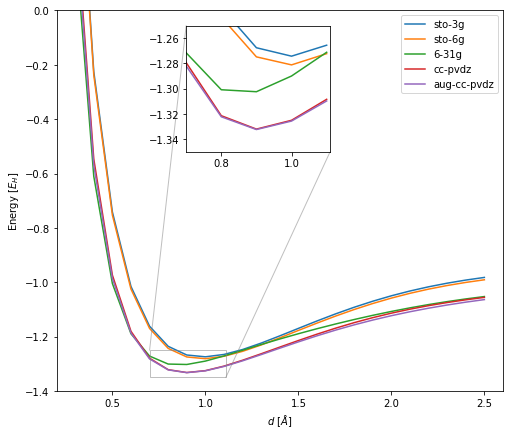

In [9]:
MIN = .7
MAX = 1.11

fig, ax = plt.subplots(figsize=[8, 7])

for (method,E) in energies.items():
    plt.plot(dist,E,label=method)
    
plt.xlabel(r"$d$ $[\AA]$")
plt.ylabel(r"Energy $[E_H]$")
plt.legend()
plt.ylim([-1.4, +0.0])
plt.xlim([0.2, 2.6])

sub_axes = plt.axes([.35, .6, .25, .25])     

sub_axes.axis(ymin=-1.35,ymax=-1.25)
sub_axes.axis(xmin=MIN,xmax=MAX)

for (method,E) in energies.items():
    y = []
    x = []    
    for i in range(len(E)):
        if(dist[i] >= MIN and dist[i] <= MAX):
            x.append(dist[i])
            y.append(E[i])
    
    sub_axes.plot(x, y,label=method) 


ax.indicate_inset_zoom(sub_axes)

#plt.ylim([-1.3, .0])
#plt.xlim([0.5, 1.5])

plt.savefig('/mnt/c/Users/Rodolfo/Desktop/figura.png')
plt.show()

In [11]:
(energies,dist)

({'sto-3g': [0.8041086871865142,
   -0.22488793558199394,
   -0.7410926666180804,
   -1.0155164364216978,
   -1.161762102919449,
   -1.235725788983385,
   -1.2675871293748995,
   -1.2742751049877588,
   -1.265572779768333,
   -1.2474455804202944,
   -1.2237815238694745,
   -1.197241631253733,
   -1.1696842990422864,
   -1.142406521122663,
   -1.1162989236635008,
   -1.0919491847590923,
   -1.0697115350089086,
   -1.049756481201356,
   -1.0321114424829525,
   -1.0166979391858937,
   -1.0033662940385621,
   -0.9919261818917495,
   -0.9821710302689763],
  'sto-6g': [0.7930249944681096,
   -0.23748138680009934,
   -0.7527805858030656,
   -1.0251057217763129,
   -1.1699429398436911,
   -1.2433092266100079,
   -1.2748268385778982,
   -1.2811879994251272,
   -1.2722647705355452,
   -1.2541321018359217,
   -1.2306719129030712,
   -1.2044585772543404,
   -1.1772556560041043,
   -1.1502958922569921,
   -1.1244398972305527,
   -1.1002689580616152,
   -1.0781444800233184,
   -1.0582520399914663,
 